# Задание 2 Глава 2

In [1]:
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy.stats

Данные из таблицы для k/n = 1/2

In [2]:
n = np.array([8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40])
d = np.array([4, 4 , 4 , 4 , 5 , 6 , 6 , 7 , 8 , 7 , 8 , 8 , 8 , 8 , 8 , 9 , 10])

Считаем вероятности как сумму биномиальных распределений для $k > \frac{d - 1}{2}$ 

In [3]:
def calc_prob(p, n, errors):
    rv = scipy.stats.binom(n, p)
    s = 0
    for errors in range(errors + 1, n + 1):
        s += rv.pmf(errors)
    return s

In [4]:
def get_error(p):
    err = []
    for i in range(0, len(n)):
        err.append(calc_prob(p, n[i], (d[i] - 1) // 2))
    
    return np.array(err)

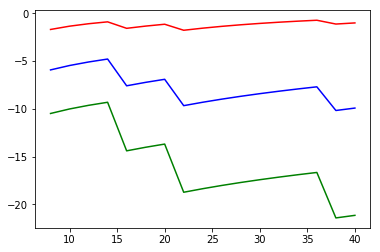

In [5]:
plt.plot(n, np.log(get_error(0.1)), 'r')
plt.plot(n, np.log(get_error(0.01)), 'b')
plt.plot(n, np.log(get_error(0.001)), 'g')
plt.show()

# Сравнение энергетических выигрышей

In [6]:
R = 1/2 # скорость кода

Посчитаем выигрыш кодирования для длины кода = 10
Перебираем вероятность ошибки и находим при какой переходной вероятности она будет $\approx 10^{-5}$

In [7]:
def get_prob_for_error(n, d, p):
    left = 1e-9
    right = 1
    for i in range(0,100):
        mid = (left + right) / 2
        if calc_prob(mid, n, d) < p:
            left = mid
        else:
            right = mid
    return left

In [10]:
N = 10
D = 4

p_for_non_coded = get_prob_for_error(N, 0, 1e-5) # предаем максимальное количество исправляемых ошибок = 0
p_for_coded = get_prob_for_error(N, D, 1e-5)

print(calc_prob(p_for_non_coded, N, 0), p_for_non_coded)
print(calc_prob(p_for_coded, N, D), p_for_coded)

1e-05 1.0000045000285003e-06
1e-05 0.034056687656013954


Без кодирования:
$p = 1 * 10^{-6} \frac{E_b}{N_0} = 10.53дБ$

С кодированием:
$p = 3 * 10^{-2} \frac{E_b}{N_0} = 4.2дБ$

Выигрыш кодирования = $\frac{10.53}{4.2 / R} = 1.25$